### MSCI 436 - Project 

This is a notebook walking through the development of our MSCI 436 - Decision Support Systems Project: StockPickr.

#### Data Loading

In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from datetime import datetime

In [399]:
data = pd.read_csv('../data/MSCI 436 - Project Dataset.csv')

In [400]:
data.head()

,Company Name,Industry,Sector,Country,Risk Level,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Billions),Employee Size,Dividend Yield,% Growth over last year
0,Apple Inc.,Technology,Consumer Electronics,USA,Low,1976,387.53,2520,164000,0.0,0.29
1,Alphabet (Google),Technology,Software Infrastructure,USA,Low,1998,282.83,1350,190234,0.0,0.34
2,Amazon,Technology,Software Application,USA,Low,1994,513.98,1030,1541000,0.0,0.07
3,NVIDIA Corporation,Technology,Semiconductors,USA,Medium,1993,26.97,653,22473,0.0,2.03
4,Tesla,Technology,Software Infrastructure,USA,High,2003,81.46,625,127855,0.0,1.25


#### Data Cleaning

In [401]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Company Name                                247 non-null    object 
 1   Industry                                    247 non-null    object 
 2   Sector                                      247 non-null    object 
 3   Country                                     247 non-null    object 
 4   Risk Level                                  247 non-null    object 
 5   Founding Year                               247 non-null    int64  
 6   Annual Revenue 2022-2023 (USD in Billions)  247 non-null    float64
 7   Market Cap (USD in Billions)                247 non-null    int64  
 8   Employee Size                               247 non-null    int64  
 9   Dividend Yield                              247 non-null    float64
 10  % Growth over 

In [402]:
data.head()

,Company Name,Industry,Sector,Country,Risk Level,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Billions),Employee Size,Dividend Yield,% Growth over last year
0,Apple Inc.,Technology,Consumer Electronics,USA,Low,1976,387.53,2520,164000,0.0,0.29
1,Alphabet (Google),Technology,Software Infrastructure,USA,Low,1998,282.83,1350,190234,0.0,0.34
2,Amazon,Technology,Software Application,USA,Low,1994,513.98,1030,1541000,0.0,0.07
3,NVIDIA Corporation,Technology,Semiconductors,USA,Medium,1993,26.97,653,22473,0.0,2.03
4,Tesla,Technology,Software Infrastructure,USA,High,2003,81.46,625,127855,0.0,1.25


In [403]:
company_names = data['Company Name']

In [404]:
current_year = datetime.now().year
data["Age of Company (Years)"] = current_year - data["Founding Year"]

#data.drop(columns=["Company Name", "Founding Year"], inplace=True)

In [405]:
data["Country"].unique()

array(['USA', 'Ireland', 'China', 'UK', 'Netherlands', 'Australia',
       'India', 'France', 'Spain', 'Switzerland', 'Denmark', 'Canada',
       'South Korea', 'Germany', 'Saudi Arabia', 'Japan', 'Taiwan'],
      dtype=object)

In [406]:
data.drop(columns="Sector", inplace=True)

In [407]:
# Ordinal Feature Engineering from categorical low, medium, and high, to 1, 2, and 3

risk_level_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
data['Risk Level'] = data['Risk Level'].map(risk_level_mapping)
data.head()

,Company Name,Industry,Country,Risk Level,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Billions),Employee Size,Dividend Yield,% Growth over last year,Age of Company (Years)
0,Apple Inc.,Technology,USA,1,1976,387.53,2520,164000,0.0,0.29,48
1,Alphabet (Google),Technology,USA,1,1998,282.83,1350,190234,0.0,0.34,26
2,Amazon,Technology,USA,1,1994,513.98,1030,1541000,0.0,0.07,30
3,NVIDIA Corporation,Technology,USA,2,1993,26.97,653,22473,0.0,2.03,31
4,Tesla,Technology,USA,3,2003,81.46,625,127855,0.0,1.25,21


#### Collinearity

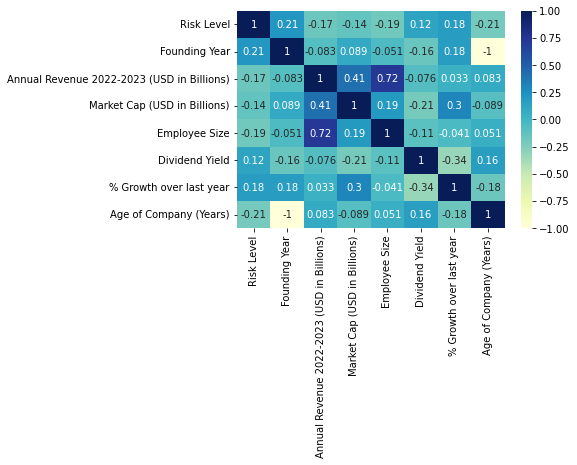

In [408]:
# plotting correlation heatmap 
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) 

# displaying heatmap 
plt.show()


#### Data Preprocessing

In [409]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data.drop(columns=["Company Name", "Founding Year"]), columns=["Industry", "Country"], drop_first=True)

# Scale the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

# Convert scaled data back to a DataFrame for better visualization
data_scaled_df = pd.DataFrame(data_scaled, columns=data_encoded.columns)

In [412]:
data_scaled_df.head()

,Risk Level,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Billions),Employee Size,Dividend Yield,% Growth over last year,Age of Company (Years),Industry_Automotive,Industry_Banking,Industry_Beverages,...,Country_Ireland,Country_Japan,Country_Netherlands,Country_Saudi Arabia,Country_South Korea,Country_Spain,Country_Switzerland,Country_Taiwan,Country_UK,Country_USA
0,-1.221857,3.341894,11.975440,0.324652,-1.103254,0.475016,-0.304893,-0.110883,-0.205412,-0.110883,...,-0.063758,-0.063758,-0.110883,-0.063758,-0.063758,-0.063758,-0.110883,-0.063758,-0.1283,1.134477
1,-1.221857,2.291400,6.265595,0.446557,-1.103254,0.669850,-0.736798,-0.110883,-0.205412,-0.110883,...,-0.063758,-0.063758,-0.110883,-0.063758,-0.063758,-0.063758,-0.110883,-0.063758,-0.1283,1.134477
2,-1.221857,4.610613,4.703929,6.723353,-1.103254,-0.382253,-0.658270,-0.110883,-0.205412,-0.110883,...,-0.063758,-0.063758,-0.110883,-0.063758,-0.063758,-0.063758,-0.110883,-0.063758,-0.1283,1.134477
3,0.532787,-0.275738,2.864090,-0.333002,-1.103254,7.255238,-0.638638,-0.110883,-0.205412,-0.110883,...,-0.063758,-0.063758,-0.110883,-0.063758,-0.063758,-0.063758,-0.110883,-0.063758,-0.1283,1.134477
4,2.287430,0.270980,2.727444,0.156692,-1.103254,4.215828,-0.834958,-0.110883,-0.205412,-0.110883,...,-0.063758,-0.063758,-0.110883,-0.063758,-0.063758,-0.063758,-0.110883,-0.063758,-0.1283,1.134477


#### K-Nearest Neighbours

We will be using a K Nearest Neighbours model to see the distance

In [413]:
from sklearn.neighbors import NearestNeighbors


# Fit the KNN model
knn = NearestNeighbors(n_neighbors=5)
knn.fit(data_scaled)

NearestNeighbors()

In [414]:
# Fit the KNN model with n_neighbors=5
knn = NearestNeighbors(n_neighbors=5)
knn.fit(data_scaled)

# Function to recommend stocks based on user input and show original feature values
def recommend_stocks(user_input, n_recommendations=5):
    # Process user input to match the data format
    user_input["Age of Company (Years)"] = current_year - user_input["Founding Year"]
    user_input.drop(columns=["Founding Year"], inplace=True)
    user_input["Risk Level"] = user_input["Risk Level"].map(risk_level_mapping)
    user_input = pd.get_dummies(user_input)
    
    # Align user input with the model's feature set
    user_input = user_input.reindex(columns=data_encoded.columns, fill_value=0)
    user_input_scaled = scaler.transform(user_input)
    
    # Find the nearest neighbors
    distances, indices = knn.kneighbors(user_input_scaled, n_neighbors=n_recommendations)
    
    # Retrieve the original data of the recommended companies
    recommended_companies = data.iloc[indices[0]]
    return recommended_companies

# Example user input (replace with actual user input)
user_input = pd.DataFrame([{
    "Industry": "Technology",
    "Country": "USA",
    "Risk Level": "Medium",
    "Founding Year": 2000,
    "Annual Revenue 2022-2023 (USD in Billions)": 50,
    "Market Cap (USD in Billions)": 200,
    "Employee Size": 10000,
    "Dividend Yield": 0.5,
    "% Growth over last year": 1.2
}])

# Recommend stocks and get their original feature values
recommended_companies = recommend_stocks(user_input, n_recommendations=5)

# Display recommended companies and their original features
print("Recommended Stocks and Their Feature Values:")
for index, row in recommended_companies.iterrows():
    print(f"\nCompany: {row['Company Name']}")
    print(row.to_string())


Recommended Stocks and Their Feature Values:

Company: Peyto Exploration & Development Corp.
Company Name                                  Peyto Exploration & Development Corp.
Industry                                                                  Oil & Gas
Country                                                                      Canada
Risk Level                                                                        3
Founding Year                                                                  1998
Annual Revenue 2022-2023 (USD in Billions)                                      1.3
Market Cap (USD in Billions)                                                      2
Employee Size                                                                   200
Dividend Yield                                                                  0.1
% Growth over last year                                                        0.06
Age of Company (Years)                                             